# Prediction of Iris Flower Species
**Developing a ML model to predict the species of flowers based on their features.**

## 1. Data Reading and Understanding

In [1]:
# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing data into dataframe
iris_df = pd.read_csv('Iris.csv')
iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# dimensions of the dataframe
iris_df.shape

(150, 6)

In [5]:
# description of the data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# descrition of the numeric data
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


The aforementioned table shows no presence of outliers.

## 2. Data Cleaning

In [7]:
# Checking for the missing values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

This shows **no missing values** in the data.

In [8]:
# Removing prefix 'iris' from the names of the species
iris_df.Species = iris_df.Species.apply(lambda x: x.split('-')[1])
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


## 3. EDA

### Correlation between the features of Species
### Heatmap

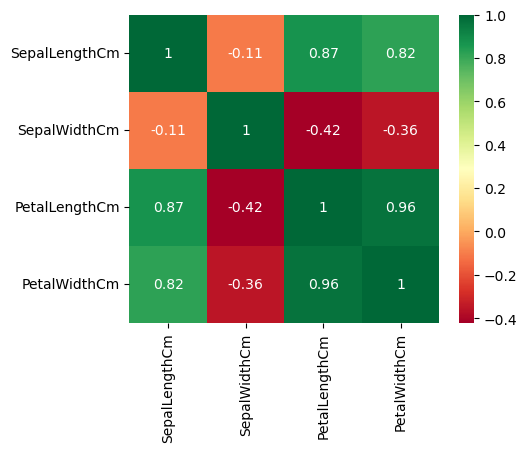

In [9]:
# heatmap of the correlation of the numeric features
plt.figure(figsize=[5,4])
sns.heatmap(iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr(), cmap='RdYlGn', annot=True)
plt.show()

The **length and width of petal** have a **high positive correlation** while the **width of sepal and petal** are **negatively correlated** to each other.

### Pairplot

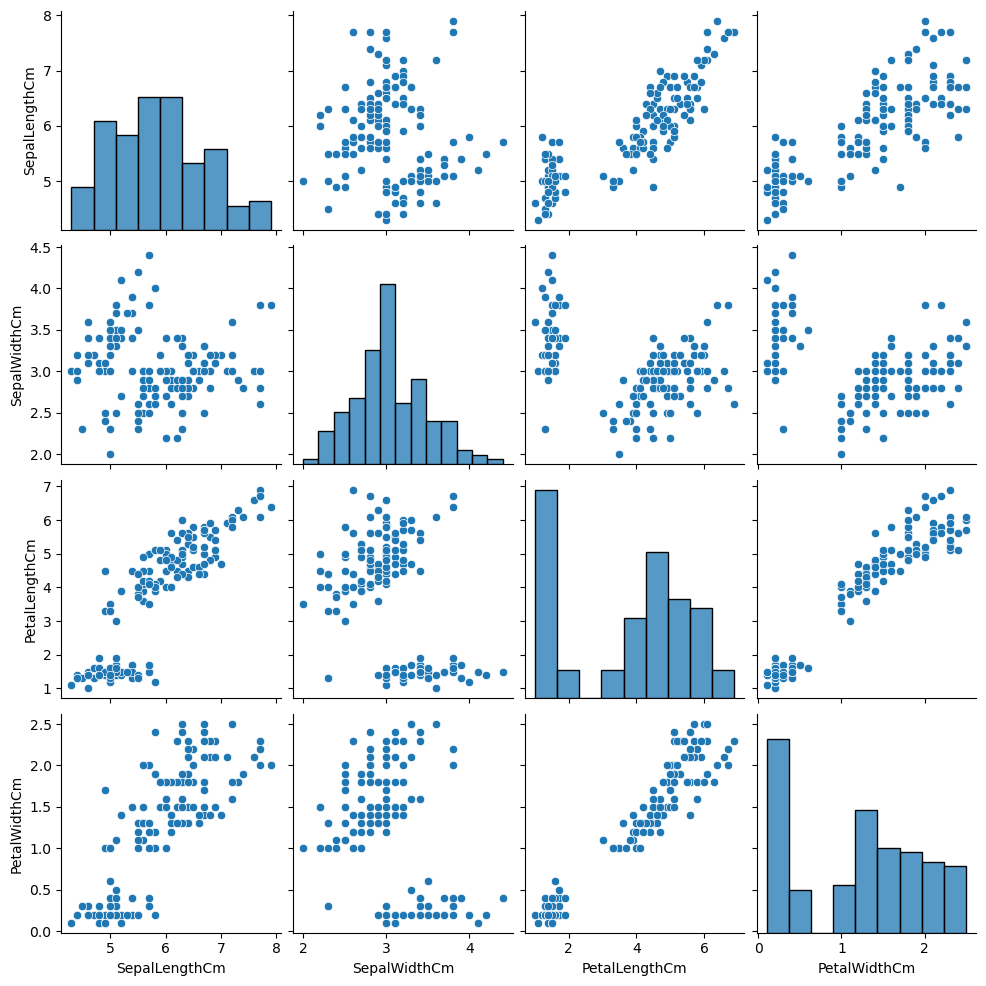

In [10]:
sns.pairplot(iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
plt.show()

The aforementioned plot shows:
- The **length and width of Petal** are mostly proportional.
- The **width of Sepal and Petal** are proportional at few points.
- The **length of Petal** and **width of Sepal** are not entirely proportional.

### Scatter plot of Length and Width of Petals

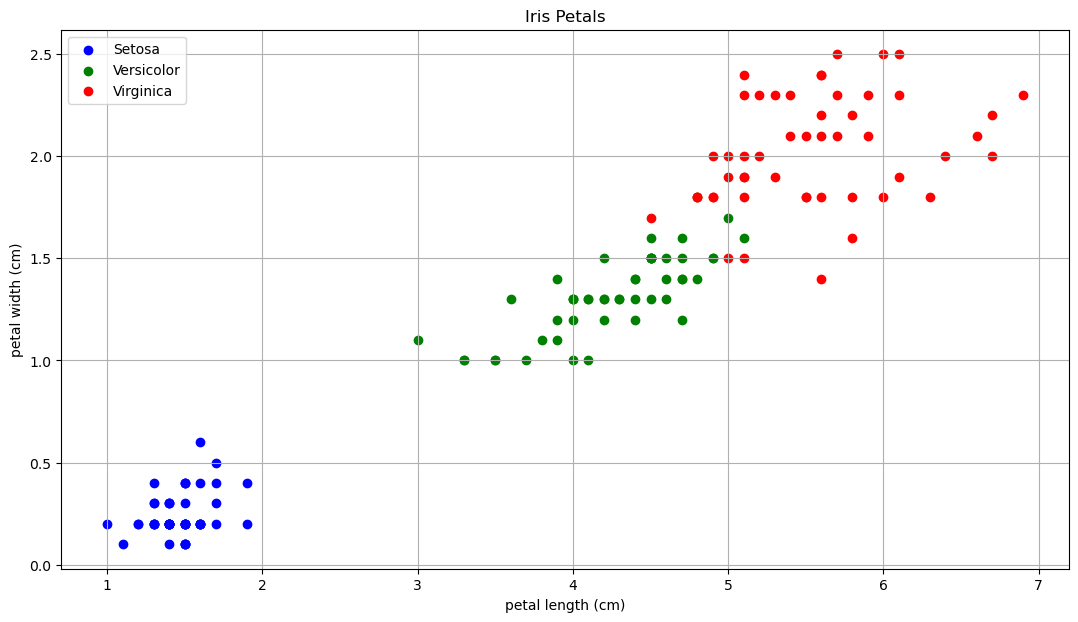

In [11]:
# Plotting Length and Width of Petals
setosa = iris_df[iris_df.Species == "setosa"]
versicolor = iris_df[iris_df.Species=='versicolor']
virginica = iris_df[iris_df.Species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], label="Versicolor", facecolor="green")
ax.scatter(virginica['PetalLengthCm'], virginica['PetalWidthCm'], label="Virginica", facecolor="red")

ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris Petals")
ax.legend()
plt.show()

According to the aforementioned plot of **Size of Petals** 
- The **Setosa species** have the **smallest size**.
- The **Virginca Species** are the **biggest**.
- The **Versicolor** comes in **middle**.   

### Scatter plot of Length and Width of Sepals

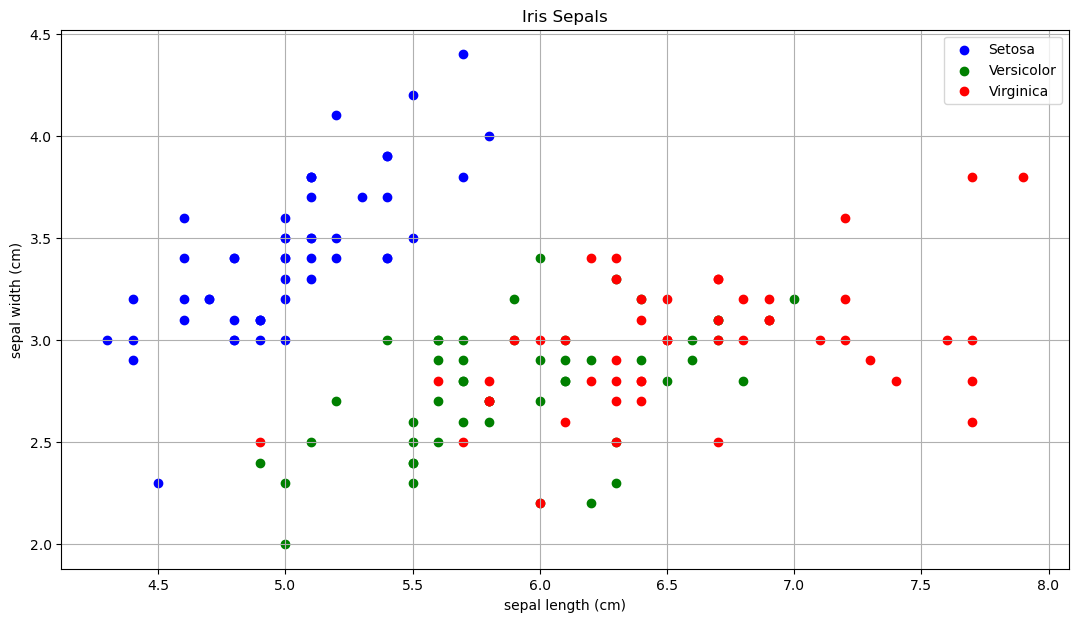

In [12]:
# Plotting Length and Width of Sepals
setosa = iris_df[iris_df.Species == "setosa"]
versicolor = iris_df[iris_df.Species=='versicolor']
virginica = iris_df[iris_df.Species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], label="Versicolor", facecolor="green")
ax.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], label="Virginica", facecolor="red")

ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris Sepals")
ax.legend()
plt.show()

According to the aforementioned plot of **Size of Sepals** 
- The **Setosa species** appears to have **bigger** size **in width** but definitly have **smaller length** as compared to other two.
- The **Virginca** Species seems to be **longest ones**.
- The **Versicolor** are in the **middle** in both length and width. 

### Count plot to check for Imbalance

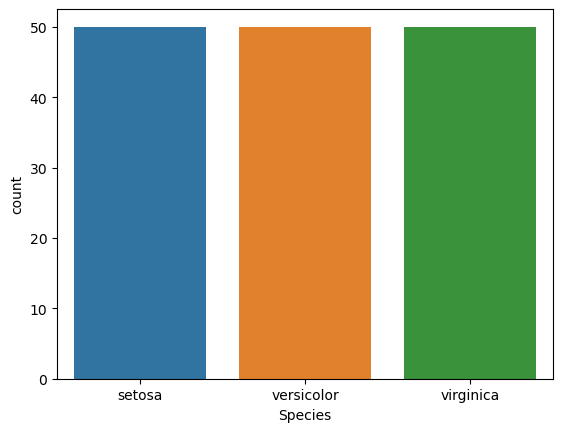

In [13]:
### Count of each Species
sns.countplot(data=iris_df, x='Species')
plt.show()

The above plot shows that there is **no class imbalance** in the data

## 4. Data Preprocessing

### Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris_df['Species'] = encoder.fit_transform(iris_df['Species'])

Encoding is done as follows:
- **Setosa** is represented by **0**.
- **Versicolor** is represented by **1**.
- **Virginica** is represented by **2**.

### Dropping uneccesary columns

In [15]:
# Dropping the 'id' column
iris_df.drop('Id', axis=1, inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Train-Test Data Split

In [16]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [17]:
# splitting the data into X and y 
X = iris_df.drop('Species', axis = 1)
y = iris_df.Species

In [18]:
# Splitting the X into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)
print('dimensions of train data of X:', X_train.shape,
     '\n dimensions of test data of X:', X_test.shape,
     '\n dimensions of train data of y:', y_train.shape,
     '\n dimensions of test data of y:', y_test.shape)

dimensions of train data of X: (105, 4) 
 dimensions of test data of X: (45, 4) 
 dimensions of train data of y: (105,) 
 dimensions of test data of y: (45,)


### Scaling

In [19]:
# Standard scaling the data
scaler = StandardScaler()
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,-0.413416,-1.464401,-0.100146,-0.321500
133,0.551222,-0.495821,0.717711,0.353650
137,0.671802,0.230614,0.951384,0.758740
75,0.912961,-0.011531,0.308783,0.218620
109,1.636440,1.441340,1.301894,1.703949


## 5. ML Models

### Logistic Regression Model

In [20]:
# model building
lr = LogisticRegression(multi_class='multinomial')

In [21]:
# fit the model
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [22]:
# predictions on train data
lr_train_pred = lr.predict(X_train)

In [91]:
# import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [24]:
# classification  report of train data predictions
print(classification_report(y_train, lr_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.92      0.94        37
           2       0.92      0.97      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [92]:
# train accuracy
print("Train Accuracy of Logistic model: ", accuracy_score(y_train, lr_train_pred))

Train Accuracy of Logistic model:  0.9619047619047619


#### Predictions on Test data

In [25]:
# scaling test data
X_test[cols] = scaler.transform(X_test[cols])

In [26]:
# predictions on testing data
lr_pred = lr.predict(X_test)

In [27]:
# metrics report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



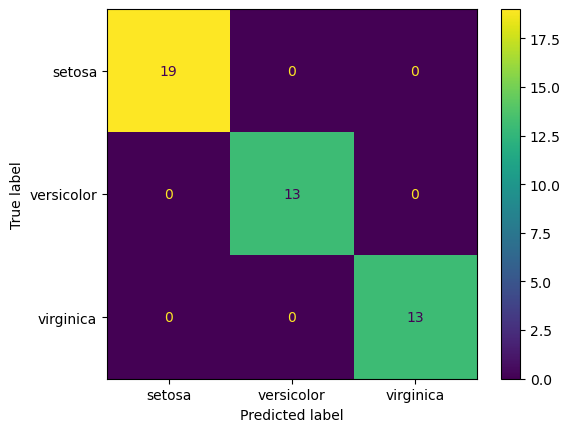

In [28]:
# confusion matrix plot
test_cm = confusion_matrix(y_test, lr_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['setosa', 'versicolor', 'virginica'])
cm_plot.plot()
plt.show()

In [93]:
# Test Accuracy
print('Test Accuracy of Logistic model: ', accuracy_score(y_test, lr_pred))

Test Accuracy of Logistic model:  1.0


### Logistic Regression with ***Hyperparameter Tuning*** 

In [29]:
# model building
lr = LogisticRegression(random_state=42)

# parameters
params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
log_model = GridSearchCV(estimator=lr, cv=folds, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=1)

#### Model Training

In [30]:
# fit model
log_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [31]:
# print best hyperparameters
print("Best Accuracy: ", log_model.best_score_)
print("Best hyperparameters: ", log_model.best_params_)

Best Accuracy:  0.9523809523809523
Best hyperparameters:  {'C': 4, 'penalty': 'l2'}


#### Model with optimal hyperparameters

In [94]:
# model
model = LogisticRegression(C=4, penalty='l2')

# fitting the model
model.fit(X_train, y_train)

# train predictions
log_train_pred = model.predict(X_train)

# classification report
print(classification_report(y_train, log_train_pred))

# train accuracy
print('Train Accuracy of Logistic model with hyperparameter tuning: ', accuracy_score(y_train, log_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.92      0.94        37
           2       0.92      0.97      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105

Train Accuracy of Logistic model with hyperparameter tuning:  0.9619047619047619


#### Predictions on Testing data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



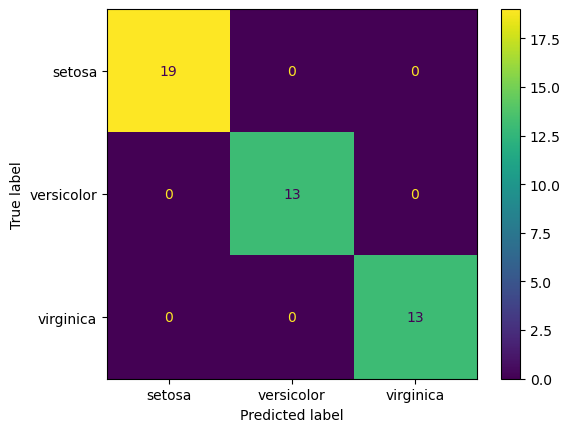

In [33]:
# test predictions
lr_test_pred = model.predict(X_test)

# classification report
print(classification_report(y_test, lr_test_pred))

# confusion matrix plot 
grid_train_cm = confusion_matrix(y_test, lr_test_pred)
grid_cm_plot = ConfusionMatrixDisplay(confusion_matrix=grid_train_cm, display_labels=['setosa', 'versicolor', 'virginica'])
grid_cm_plot.plot()
plt.show()

In [95]:
# test Accuracy
print('Test Accuracy of Logistic model with Hyperparameter Tuning: ', accuracy_score(y_test, lr_test_pred))

Test Accuracy of Logistic model with Hyperparameter Tuning:  1.0


### Decision Tree Model

#### Model Training

In [34]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [35]:
# creating function for plotting tree with max_depth=5
def get_dt_graph(classifier, train):
    dot_data = StringIO()
    export_graphviz(classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=train.columns, 
                    class_names=['setosa', 'versicolor', 'virginica'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [36]:
# fitting the model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

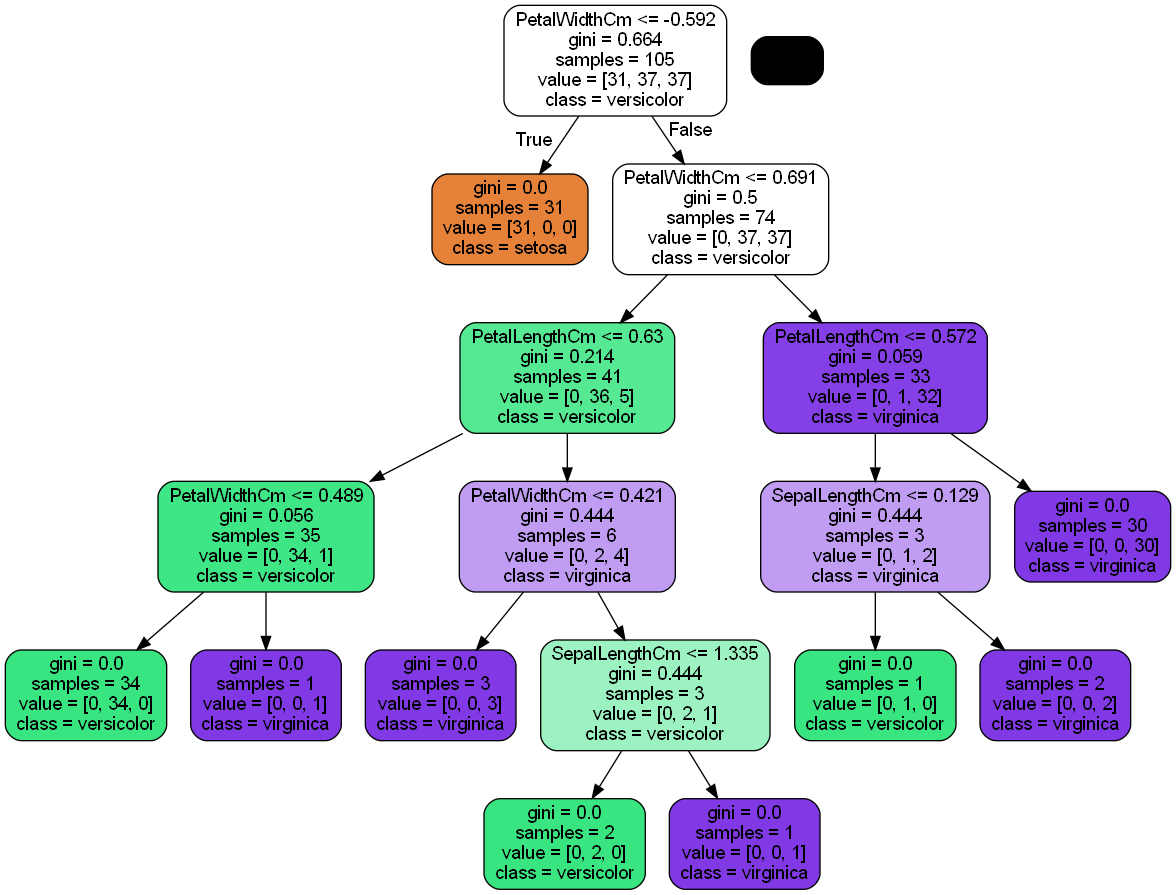

In [37]:
# plotting tree 
gph = get_dt_graph(dt, X_train)
Image(gph.create_png(), width=800, height=900)

In [38]:
# predictions on train data
dt_train_pred = dt.predict(X_train)

In [39]:
# classification report
print(classification_report(y_train, dt_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [96]:
# Train Accuracy
print('Train Accuracy of Decision Tree Model: ', accuracy_score(y_train, dt_train_pred))

Train Accuracy of Decision Tree Model:  1.0


#### Predections on Testing data

In [41]:
# predictions on test data
dt_pred = dt.predict(X_test)

In [42]:
# classification report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



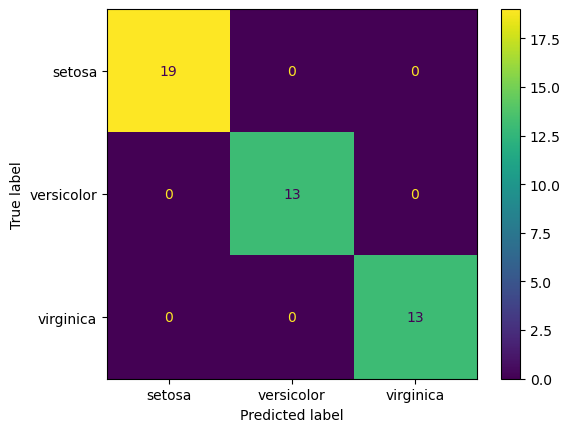

In [43]:
# confusion matrix plot for decision trees
dt_cm = confusion_matrix(y_test, dt_pred)
dt_cm_plot = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=['setosa', 'versicolor', 'virginica'])
dt_cm_plot.plot()
plt.show()

In [97]:
# Test Accuracy
print('Test Accuracy of Decision Tree: ', accuracy_score(y_test, dt_pred))

Test Accuracy of Decision Tree:  1.0


### Decision Tree model with ***Hyper-parameter tuning*** 

In [44]:
# fitting the model
dt = DecisionTreeClassifier(random_state=42)

# parameters
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'max_features': [2,3,4],
    'min_samples_leaf': [5, 10, 20, 50, 100, 500],
    'criterion': ["gini", "entropy"]
}

In [45]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           n_jobs=-1, verbose=1, scoring="accuracy")

#### Model Training

In [46]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
CPU times: total: 812 ms
Wall time: 4 s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [47]:
# grid best score
grid_search.best_score_

0.9428571428571428

In [48]:
# best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       random_state=42)

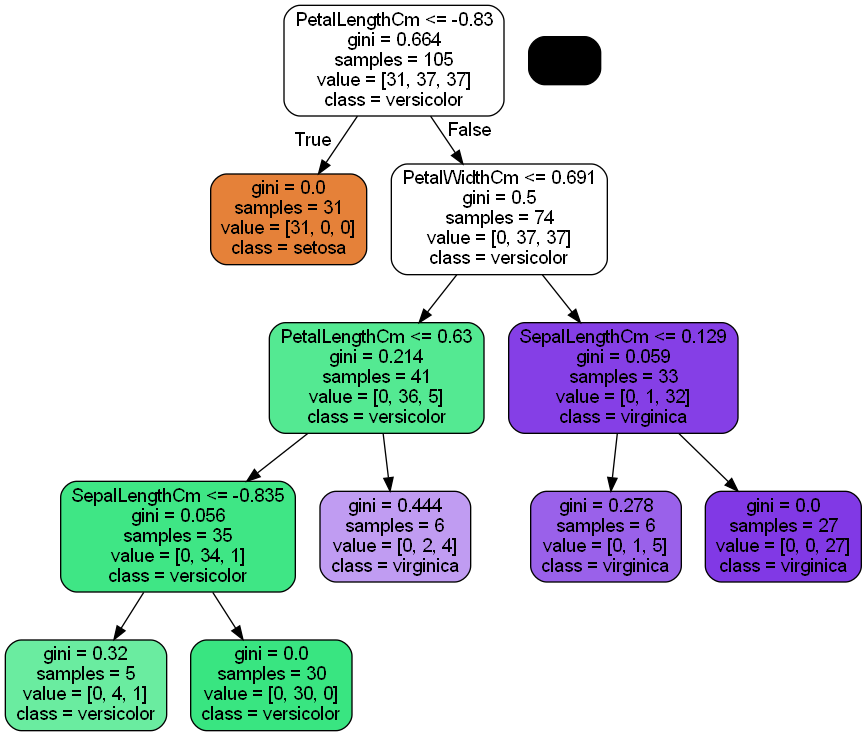

In [49]:
# plotting tree of best estimator
gph = get_dt_graph(dt_best, X_train)
Image(gph.create_png())

In [50]:
# predictions on train data
grid_dt_train_pred = dt_best.predict(X_train)

In [51]:
# classification report
print(classification_report(y_train, grid_dt_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.92      0.94        37
           2       0.92      0.97      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [98]:
# Train Accuracy
print('Train Accuracy of Decision Trees with Hyperparameter Tuning: ', accuracy_score(y_train, grid_dt_train_pred))

Train Accuracy of Decision Trees with Hyperparameter Tuning:  0.9619047619047619


#### Predictions on Testing data

In [53]:
# predictions on test data
dt_test_pred = dt_best.predict(X_test)

# classification report
print(classification_report(y_test, dt_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



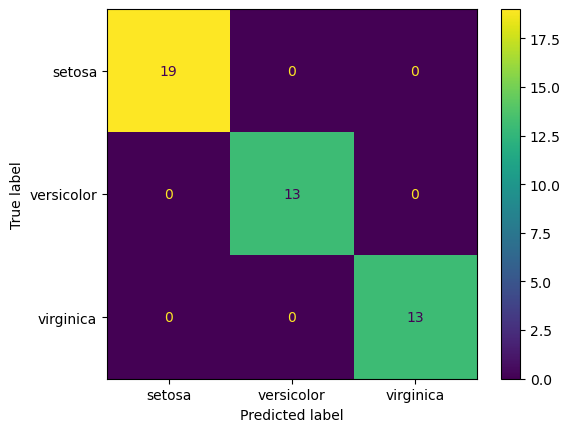

In [54]:
# confusion matrix plot 
dt_cm = confusion_matrix(y_test, dt_test_pred)
dt_cm_plot = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=['setosa', 'versicolor', 'virginica'])
dt_cm_plot.plot()
plt.show()

In [99]:
# Test Accuracy
print('Test Accuracy of Decision Trees with Hyperparameter Tuning: ', accuracy_score(y_test, dt_test_pred))

Test Accuracy of Decision Trees with Hyperparameter Tuning:  1.0


### Random Forest model

In [55]:
# model buiding
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=100, oob_score=True)

#### Model Training

In [56]:
# model Training
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, oob_score=True,
                       random_state=100)

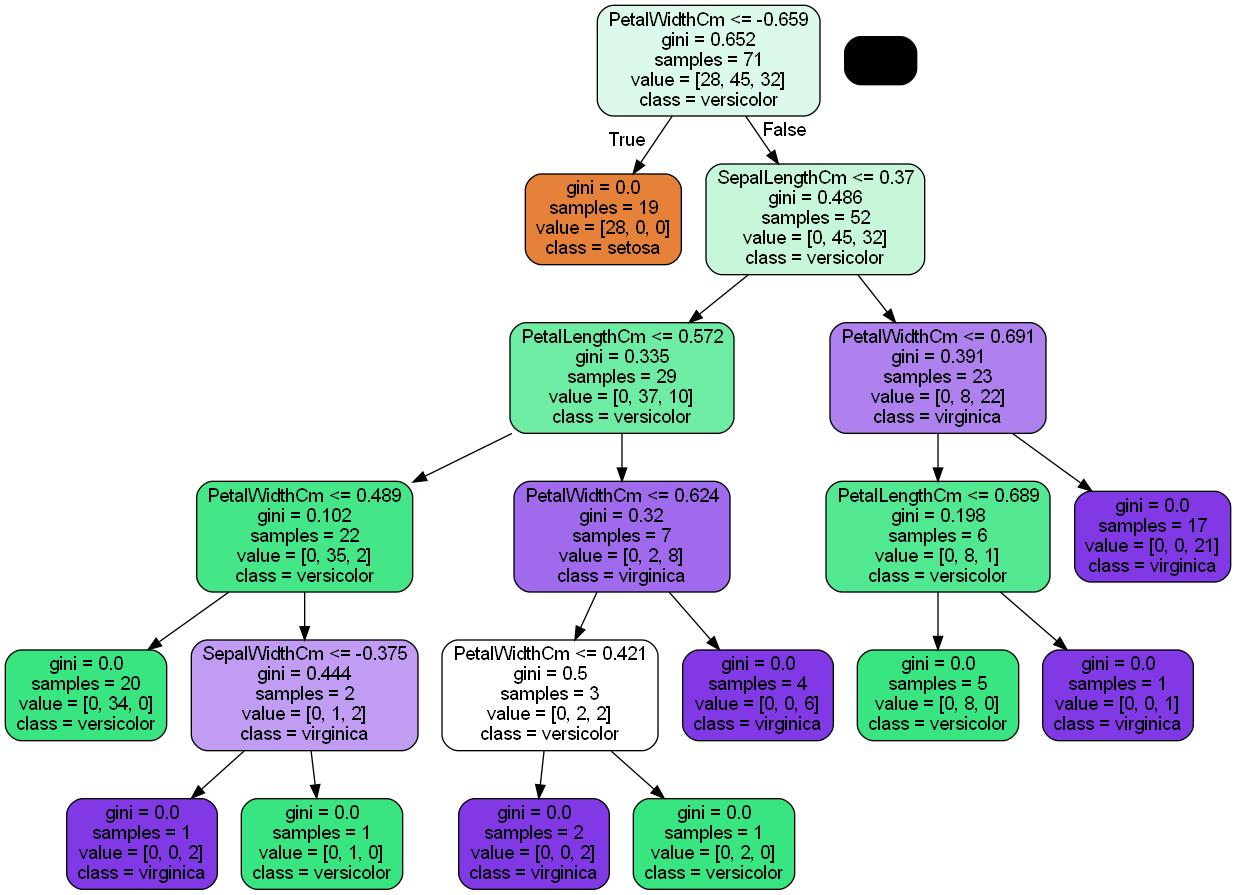

In [57]:
# plotting random forest(of first estimator) with max_depth=5
gph = get_dt_graph(rf.estimators_[0], X_train)
Image(gph.create_png(), width=800, height=900)

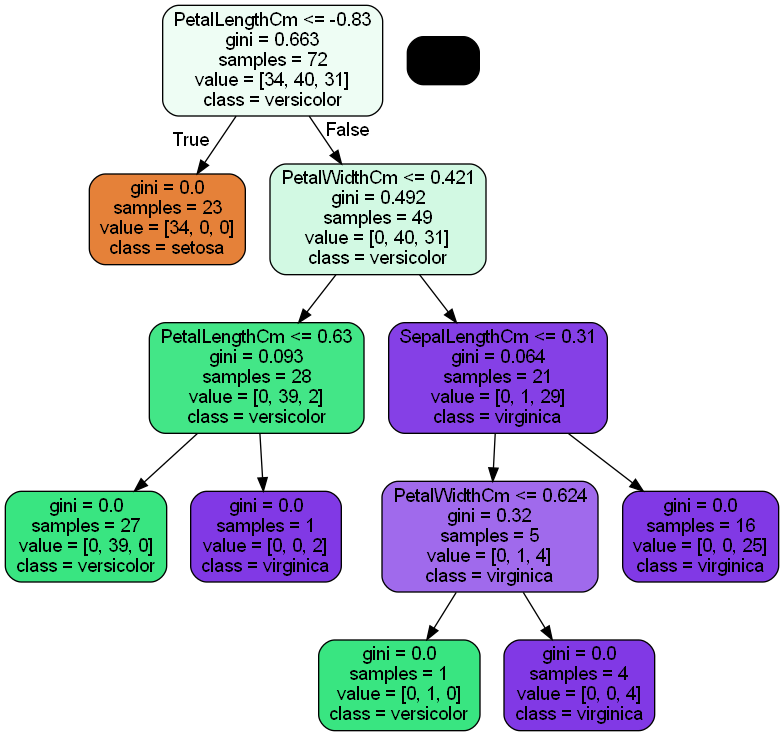

In [58]:
# plotting random forest(of 9th estimator) with max_depth=5
gph = get_dt_graph(rf.estimators_[9], X_train)
Image(gph.create_png(), width=800, height=900)

In [59]:
# predictions on train data
rf_train_pred = rf.predict(X_train)

# classification report
print(classification_report(y_train, rf_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [100]:
# Train Accuracy
print('Train Accuracy of Random Forest: ', accuracy_score(y_train, rf_train_pred))

Train Accuracy of Random Forest:  1.0


#### Predictions on Testing Data

In [61]:
# predictions on test data
rf_pred = rf.predict(X_test)

# classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



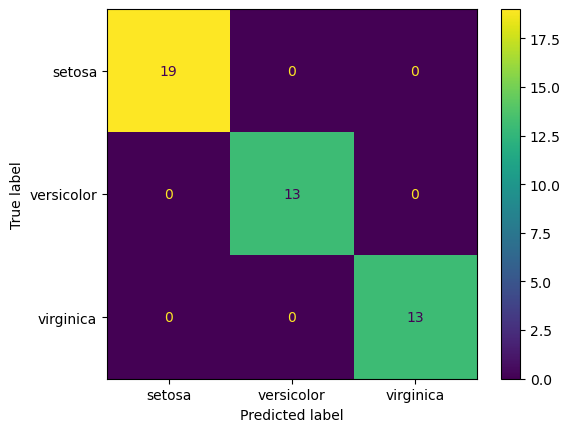

In [62]:
# confusion matrix plot for decision trees
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cm_plot = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['setosa', 'versicolor', 'virginica'])
rf_cm_plot.plot()
plt.show()

In [101]:
# Test Accuracy
print('Test Accuracy of Random Forest: ', accuracy_score(y_test, rf_pred))

Test Accuracy of Random Forest:  1.0


### Random Forest with ***Hyper-parameter tuning*** 

In [63]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 500],
    'max_features': [2,3,4],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [64]:
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1, verbose=1, scoring = "accuracy")

#### Model Training

In [65]:
%%time
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits
CPU times: total: 12.9 s
Wall time: 17min 19s


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [66]:
# grid best score
grid_search_rf.best_score_

0.9523809523809523

In [67]:
# best estimator
rf_best = grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=1, max_features=4, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

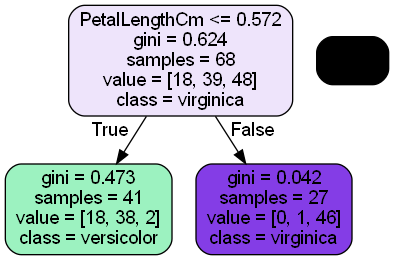

In [68]:
# plotting tree of best estimator
gph = get_dt_graph(rf_best.estimators_[0], X_train)
Image(gph.create_png())

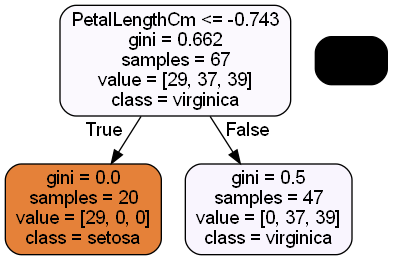

In [69]:
# plotting tree of best estimator(29th)
gph = get_dt_graph(rf_best.estimators_[29], X_train)
Image(gph.create_png())

In [70]:
# predictions on train data
rfgrid_train_pred = rf_best.predict(X_train)

# classification report
print(classification_report(y_train, rfgrid_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      0.92      0.96        37
           2       0.93      1.00      0.96        37

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [102]:
# Train Accuracy
print('Train Accuracy of Random Forest with Hyperparameter Tuning: ', accuracy_score(y_train, rfgrid_train_pred))

Train Accuracy of Random Forest with Hyperparameter Tuning:  0.9714285714285714


#### Predictions on Testing data

In [72]:
# predictions on test data
rfgrid_test_pred = rf_best.predict(X_test)

# classification report
print(classification_report(y_test, rfgrid_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



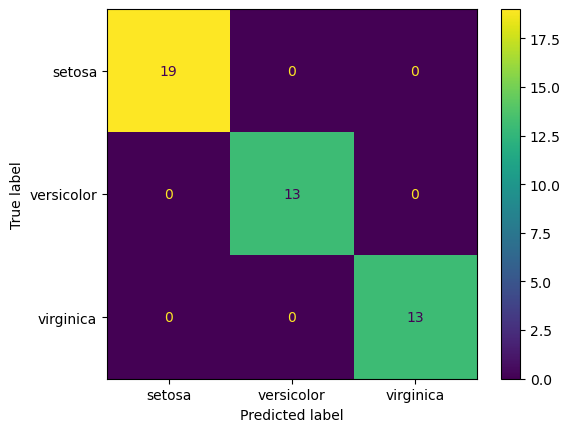

In [73]:
# confusion matrix plot 
grid_test_cm = confusion_matrix(y_test, rfgrid_test_pred)
grid_cm_plot = ConfusionMatrixDisplay(confusion_matrix=grid_test_cm, display_labels=['setosa', 'versicolor', 'virginica'])
grid_cm_plot.plot()
plt.show()

In [103]:
# Test Accuracy
print('Test Accuracy of Random Forest with Hyperparameter Tuning: ', accuracy_score(y_test, rfgrid_test_pred))

Test Accuracy of Random Forest with Hyperparameter Tuning:  1.0


### SVM Model 

#### Model Training

In [74]:
# model building
kernels = ['linear',  'rbf', 'poly']

for kernel in kernels:
    svm_model = SVC(kernel = kernel)

    # model training
    svm_model.fit(X_train, y_train) 
    svm_train_pred = model.predict(X_train)
    
    # Accuracy    
    print("Accuracy Using {}".format(kernel), accuracy_score(y_train, svm_train_pred))

Accuracy Using linear 0.9619047619047619
Accuracy Using rbf 0.9619047619047619
Accuracy Using poly 0.9619047619047619


In [75]:
# classification report
print(classification_report(y_train, svm_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.92      0.94        37
           2       0.92      0.97      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [104]:
# Train Accuracy
print('Train Accuracy of SVM classifier: ', accuracy_score(y_train, svm_train_pred))

Train Accuracy of SVM classifier:  0.9619047619047619


#### Predictions on Testing data

In [77]:
# predicting on test data
for kernel in kernels:
    svm_test_pred = model.predict(X_test)
# Accuracy
    print("Accuracy Using {}".format(kernel), accuracy_score(y_test, svm_test_pred))

Accuracy Using linear 1.0
Accuracy Using rbf 1.0
Accuracy Using poly 1.0


In [78]:
# classification report
print(classification_report(y_test, svm_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



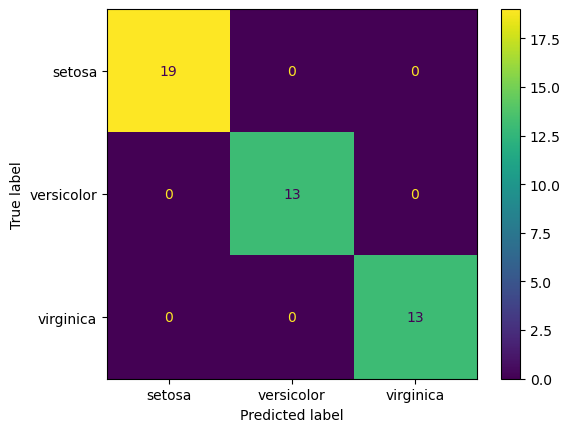

In [79]:
# confusion matrix plot 
grid_test_cm = confusion_matrix(y_test, svm_test_pred)
grid_cm_plot = ConfusionMatrixDisplay(confusion_matrix=grid_test_cm, display_labels=['setosa', 'versicolor', 'virginica'])
grid_cm_plot.plot()
plt.show()

In [105]:
# Test Accuracy
print('Test Accuracy of SVM: ', accuracy_score(y_test, svm_test_pred))

Test Accuracy of SVM:  1.0


### SVM with ***Hyperparameter Tuning***  

#### Model Training

In [80]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_svc = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_svc.fit(X_train, y_train)                 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [81]:
# cv results
cv_results = pd.DataFrame(model_svc.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006657,0.005780,0.011677,0.004755,1,0.01,"{'C': 1, 'gamma': 0.01}",0.809524,0.857143,0.761905,...,0.857143,0.079682,7,0.880952,0.904762,0.880952,0.833333,0.892857,0.878571,0.024281
1,0.008549,0.007142,0.007767,0.005789,1,0.001,"{'C': 1, 'gamma': 0.001}",0.333333,0.238095,0.333333,...,0.285714,0.042592,11,0.357143,0.380952,0.357143,0.380952,0.369048,0.369048,0.010648
2,0.008932,0.008327,0.003345,0.006153,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.333333,0.238095,0.333333,...,0.285714,0.042592,11,0.357143,0.380952,0.357143,0.380952,0.369048,0.369048,0.010648
3,0.002328,0.002851,0.004980,0.005712,10,0.01,"{'C': 10, 'gamma': 0.01}",0.809524,0.904762,0.952381,...,0.923810,0.064594,4,0.976190,0.940476,0.952381,0.964286,0.952381,0.957143,0.012141
4,0.004444,0.006147,0.006996,0.008649,10,0.001,"{'C': 10, 'gamma': 0.001}",0.809524,0.857143,0.761905,...,0.857143,0.079682,7,0.880952,0.904762,0.880952,0.833333,0.892857,0.878571,0.024281


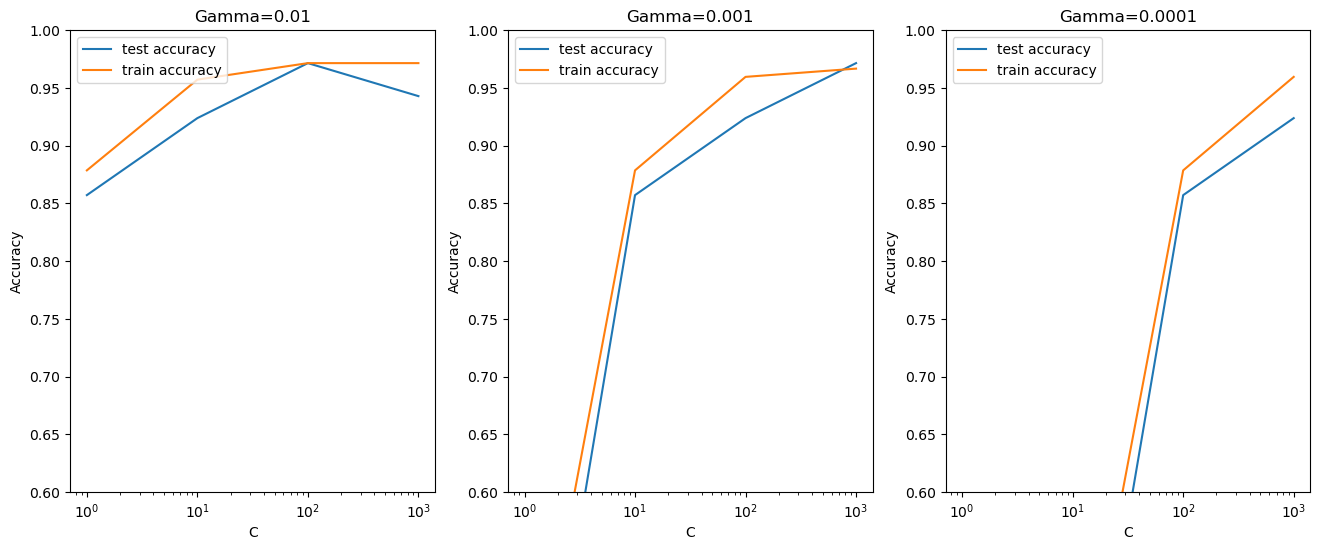

In [82]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

The plots above show some useful insights:
- At any value of gamma, a high value of C leads to better performance
- None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other

In [83]:
# printing the optimal accuracy score and hyperparameters
best_score = model_svc.best_score_
best_hyperparams = model_svc.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9714285714285713 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


#### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest accuracy.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      0.89      0.94        37
           2       0.90      1.00      0.95        37

    accuracy                           0.96       105
   macro avg       0.97      0.96      0.96       105
weighted avg       0.97      0.96      0.96       105



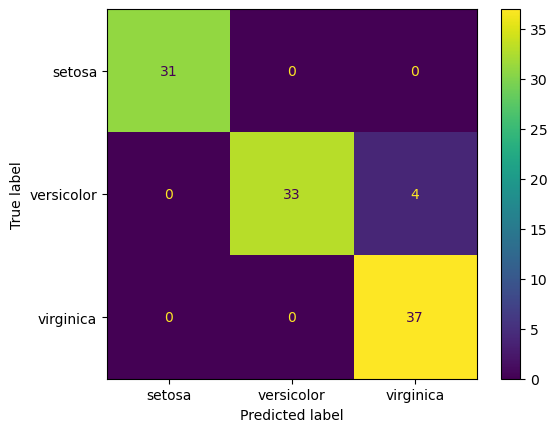

In [108]:
# model with optimal hyperparameters

# model
SVM_model = SVC(C=100, gamma=0.01, kernel="rbf")

SVM_model.fit(X_train, y_train)
train_svm_pred = SVM_model.predict(X_train)

# classification report
print(classification_report(y_train, train_svm_pred))

# confusion matrix plot 
grid_train_cm = confusion_matrix(y_train, train_svm_pred)
grid_cm_plot = ConfusionMatrixDisplay(confusion_matrix=grid_train_cm, display_labels=['setosa', 'versicolor', 'virginica'])
grid_cm_plot.plot()
plt.show()

In [109]:
# Train Accuracy
print('Train Accuracy of SVM with Hyperparameter Tuning: ', accuracy_score(y_train, train_svm_pred))

Train Accuracy of SVM with Hyperparameter Tuning:  0.9619047619047619


#### Model Testing

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



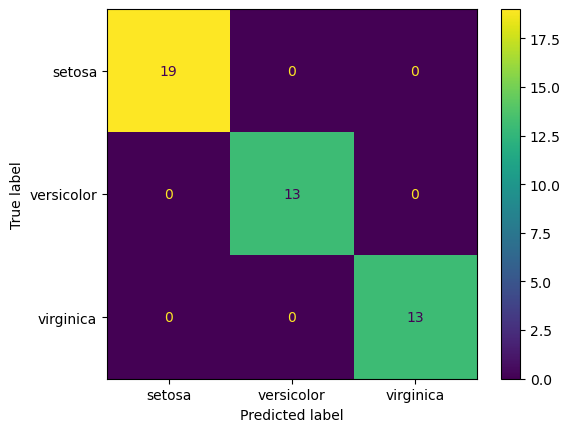

In [85]:
# testing model with optimal hyperparameters

# test predictions
test_svm_pred = SVM_model.predict(X_test)

# classification report
print(classification_report(y_test, test_svm_pred))

# confusion matrix plot 
grid_test_cm = confusion_matrix(y_test, test_svm_pred)
grid_cm_plot = ConfusionMatrixDisplay(confusion_matrix=grid_test_cm, display_labels=['setosa', 'versicolor', 'virginica'])
grid_cm_plot.plot()
plt.show()

In [110]:
# Test Accuracy
print('Test Accuracy of SVM with Hyperparameter Tuning: ', accuracy_score(y_test, test_svm_pred))

Test Accuracy of SVM with Hyperparameter Tuning:  1.0


### Testing Model through User Input

In [111]:
# Input the sepallength, sepalwidth, petallength & petalwidth to identify the species
input_SL = float(input("sepal Length : "))
input_SW = float(input("sepal Width : "))
input_PL = float(input("petal Length : "))
input_PW = float(input("petal Width : "))

sepal Length : 2.1
sepal Width : 3.1
petal Length : 4.1
petal Width : 1.1


In [112]:
#converting the input values to a dataframe
input_values = pd.DataFrame([[input_SL, input_SW, input_PL, input_PW]])

#scaling the user input
input_values = scaler.transform(input_values)

In [113]:
#predicting the output for the newValue
prediction = SVM_model.predict(input_values)

#decoding the output by mapping predicted labels to the original species
result = encoder.inverse_transform(prediction)

In [114]:
#classification of the species
result[0]

'setosa'

### Pickle Files for web application

In [115]:
# pickle 3 files
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(SVM_model,open('SVC_model.pkl','wb'))
pickle.dump(encoder,open('encoder.pkl', 'wb'))